
Call Center Data - Data Analytics

Data Analytics of Call Center Data:
Objective: In this exercise, I performed Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
Data Extracting.
Data Cleaning.
Data Reorganizing.
Data Transformation.
Data Visualization.


From the dataset, we found that Electronics EMS-related calls represented the most 911 calls, followed by traffic and then fire. We also found two outliers that occurred on March 2nd, 2018, and November 15th, 2018, both likely due to severe weather conditions, and mentioned how, with more research, you could draw insights from the investigation of these two dates and the data behind it.


In [1]:
## Import libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as ss

In [2]:
## Read data 

data = pd.read_csv(r"../call_center_data_analysis_project/call_center_data.csv")

In [3]:
## Display first five rows of data

data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [35]:
## Getting the total size of the dataset
data.shape[0]

423909

In [4]:
## Getting the information of our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
## Getting the all over view of our dataset

data.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [6]:
## Cheaking for null value 

data.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

As we see there are many missing value in the zip and township columns. So therefore, if we look for the top value in zip and township columns, we have to keep in mind that most of the zip code data and some of the township data are missing. 

In [7]:
## Display the top 5 zip code

data['zip'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
## Display the top 5 township

data['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [9]:
## See how many titles are unique 

data['title'].nunique()

141

In [10]:
## Seperate the title heading from tite column

data['reasons']=data['title'].apply(lambda x :x.split(':')[0])

In [11]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
## Display all reasons data with their counts

data['reasons'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reasons, dtype: int64

<Axes: xlabel='reasons', ylabel='count'>

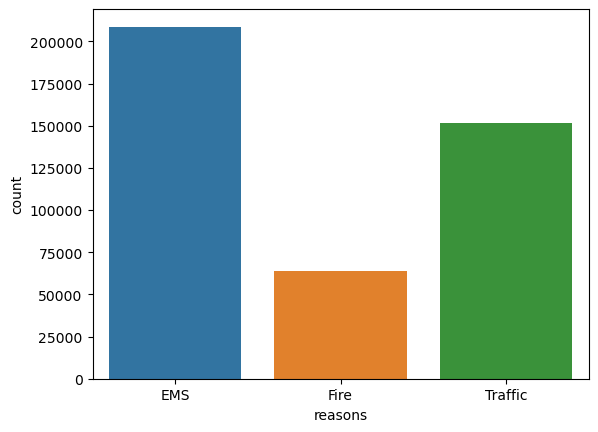

In [13]:
## Vizualize the results

sns.countplot(data=data,x='reasons')

As we seen from the above vizualize, the EMS has the highest apperance and fire has the less reprsentation in our data

In [14]:
## Changing the date to a datetime dtype

data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [15]:
## Create extra column using date time 

data['month']=data['timeStamp'].dt.month
data['Day']=data['timeStamp'].dt.day
data['hour']=data['timeStamp'].dt.hour
data['day_of_weak']=data['timeStamp'].dt.dayofweek
data['date']=data['timeStamp'].dt.date
data['date']=pd.to_datetime(data['date'])

In [16]:
## Replace the day of the weeks with a day_of_week colunm

data['day_of_week']=data.day_of_weak.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

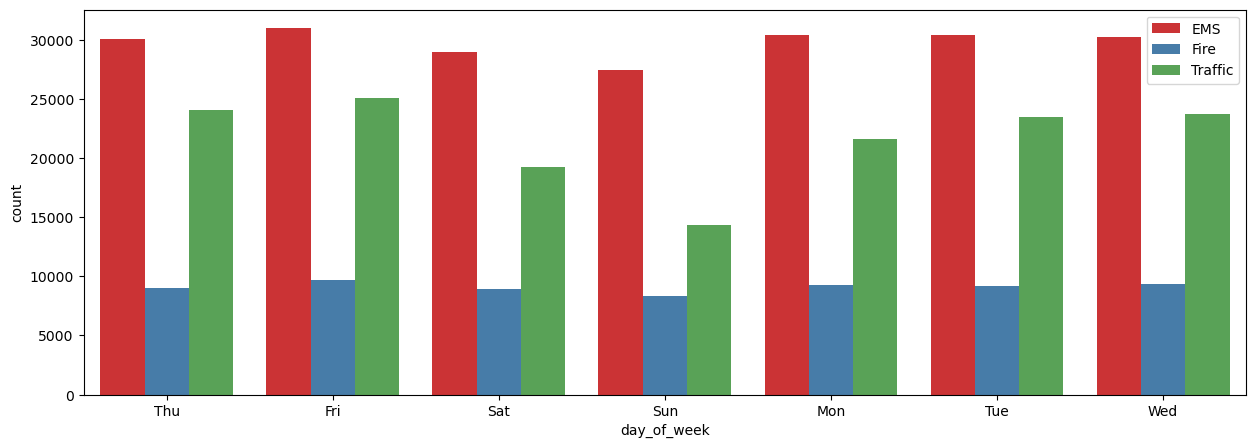

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='day_of_week', hue='reasons',palette = 'Set1')
plt.legend()
plt.show()

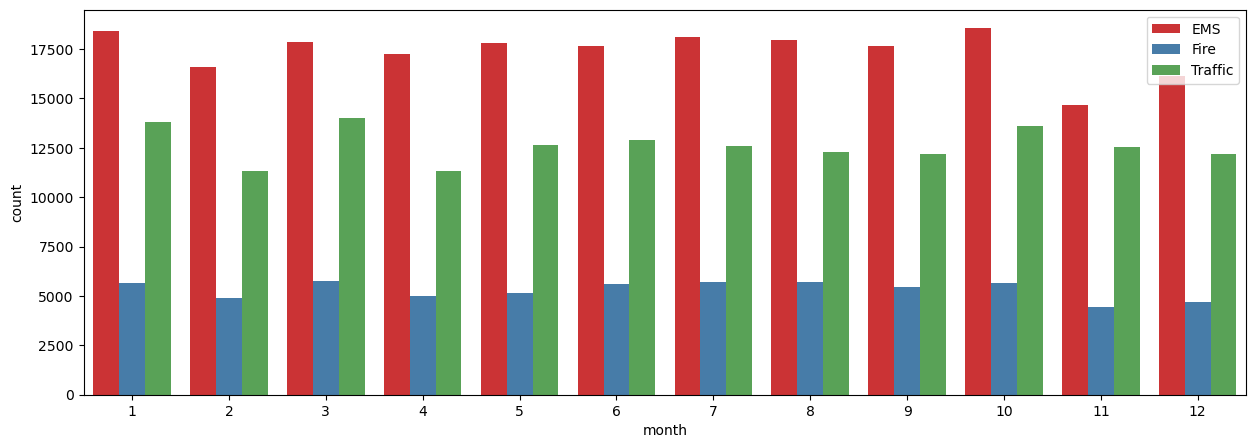

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='month',hue='reasons',palette = 'Set1')
plt.legend()
plt.show()

Text(0, 0.5, 'count')

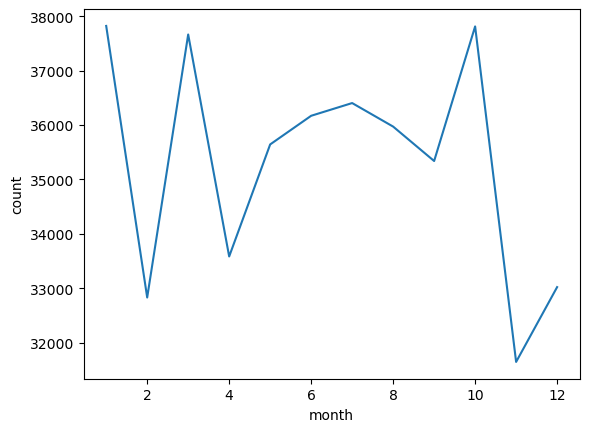

In [19]:
## Getting the trend per month 

data.groupby('month').count().plot.line(use_index=True,y = 'title',legend = None)
plt.ylabel('count')

Text(0, 0.5, 'count')

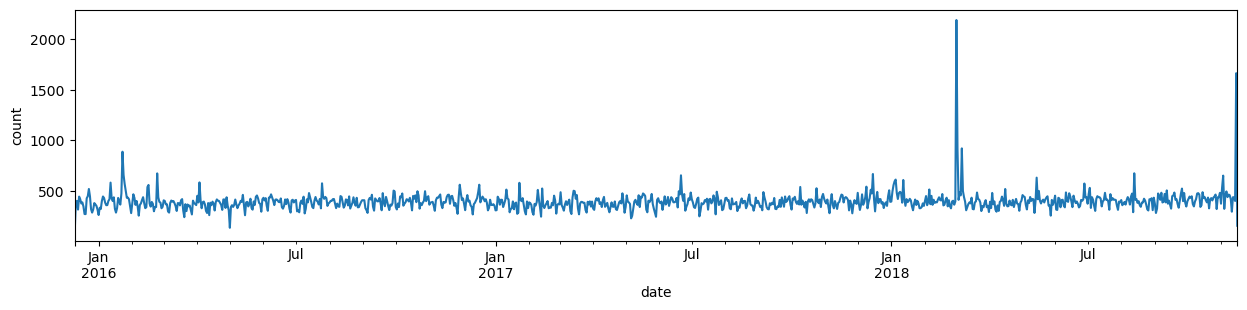

In [20]:
data.groupby('date').count().plot.line(use_index=True, y = 'title', legend = None, figsize=(15,3))
plt.ylabel('count')

Here we notice the outlier in march 2018 and in november 2018

# Now we are investigating the outlier 

In [21]:
data.groupby(data[(data['date'].dt.year >= 2018) & (data['date'].dt.month == 3)]['date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,month,Day,hour,day_of_weak,date,day_of_week
date,,,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484,484,484
2018-03-06,456,456,456,397,456,456,455,456,456,456,456,456,456,456,456,456
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920,920,920,920
2018-03-08,499,499,499,449,499,499,499,499,499,499,499,499,499,499,499,499
2018-03-09,439,439,439,396,439,439,439,439,439,439,439,439,439,439,439,439


In [22]:
data[data.date == '2018-03-02']['reasons'].value_counts()

Traffic    1328
Fire        568
EMS         291
Name: reasons, dtype: int64

<Axes: xlabel='reasons', ylabel='count'>

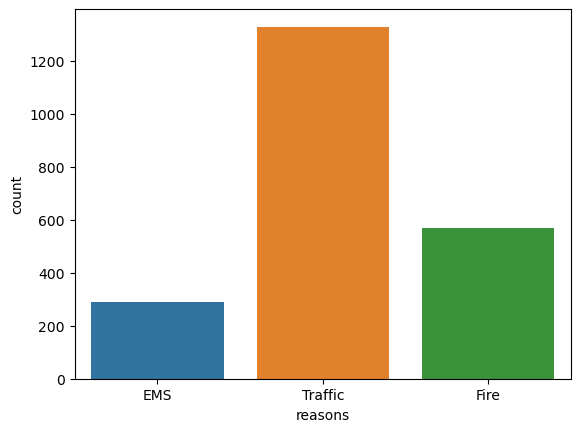

In [23]:
sns.countplot(x='reasons',data=data[data['date']=='2018-03-02'])

After seeing this, it looks differnt from the countplot of entire data set. Here we can say that their is most likely an event that cause traffic calls that may happen for some reasons. 

# Now let's us check in the month of November

In [24]:
data.groupby(data[(data['date'].dt.year >= 2018) & (data['date'].dt.month == 11)]['date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,month,Day,hour,day_of_weak,date,day_of_week
date,,,,,,,,,,,,,,,,
2018-11-01,374,374,374,325,374,374,374,374,374,374,374,374,374,374,374,374
2018-11-02,534,534,534,482,534,534,534,534,534,534,534,534,534,534,534,534
2018-11-03,651,651,651,562,651,651,650,651,651,651,651,651,651,651,651,651
2018-11-04,323,323,323,281,323,323,323,323,323,323,323,323,323,323,323,323
2018-11-05,457,457,457,401,457,457,456,457,457,457,457,457,457,457,457,457
2018-11-06,495,495,495,441,495,495,495,495,495,495,495,495,495,495,495,495
2018-11-07,439,439,439,389,439,439,439,439,439,439,439,439,439,439,439,439
2018-11-08,464,464,464,399,464,464,464,464,464,464,464,464,464,464,464,464
2018-11-09,458,458,458,418,458,458,458,458,458,458,458,458,458,458,458,458


<Axes: xlabel='reasons', ylabel='count'>

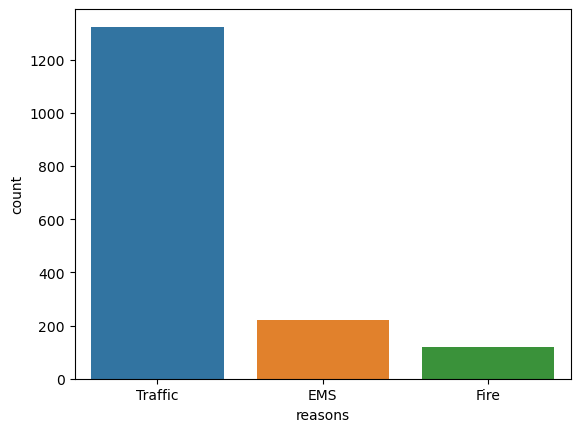

In [25]:
sns.countplot(x='reasons',data=data[data['date']=='2018-11-15'])

So as we see that something similar is happening to 15 novemeber, same as 2nd march. I think it is similar to it, so we have seen that it could be similar to 2nd march.

In [26]:
62*65

4030

In [27]:
data.groupby(['date','reasons']).count().unstack()

lat               lng              desc               zip  ...  \
reasons     EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS  ...   
date                                                                   ...   
2015-12-10   58   15      41   58   15      41   58   15      41   53  ...   
2015-12-11  186   68     137  186   68     137  186   68     137  166  ...   
2015-12-12  188   69     145  188   69     145  188   69     145  170  ...   
2015-12-13  191   50      75  191   50      75  191   50      75  179  ...   
2015-12-14  221   39     184  221   39     184  221   39     184  200  ...   
...         ...  ...     ...  ...  ...     ...  ...  ...     ...  ...  ...   
2018-11-12  211   83     144  211   83     144  211   83     144  192  ...   
2018-11-13  187   68     182  187   68     182  187   68     182  168  ...   
2018-11-14  187   54     160  187   54     160  187   54     160  177  ...   
2018-11-15  220  118    1324  220  118    1324  220  118    1324  191  ...   
2018-11-16   45   20      91   45   20      91   45   20      91   42  ...   

               Day hour              day_of_weak              day_of_week  \
reasons    Traffic  EMS Fire Traffic         EMS Fire Traffic         EMS   
date                                                                        
2015-12-10      41   58   15      41          58   15      41          58   
2015-12-11     137  186   68     137         186   68     137         186   
2015-12-12     145  188   69     145         188   69     145         188   
2015-12-13      75  191   50      75         191   50      75         191   
2015-12-14     184  221   39     184         221   39     184         221   
...            ...  ...  ...     ...         ...  ...     ...         ...   
2018-11-12     144  211   83     144         211   83     144         211   
2018-11-13     182  187   68     182         187   68     182         187   
2018-11-14     160  187   54     160         187   54     160         187   
2018-11-15    1324  220  118    1324         220  118    1324         220   
2018-11-16      91   45   20      91          45   20      91          45   

                         
reasons    Fire Traffic  
date                     
2015-12-10   15      41  
2015-12-11   68     137  
2015-12-12   69     145  
2015-12-13   50      75  
2015-12-14   39     184  
...         ...     ...  
2018-11-12   83     144  
2018-11-13   68     182  
2018-11-14   54     160  
2018-11-15  118    1324  
2018-11-16   20      91  

[1073 rows x 42 columns]

Text(0, 0.5, 'count')

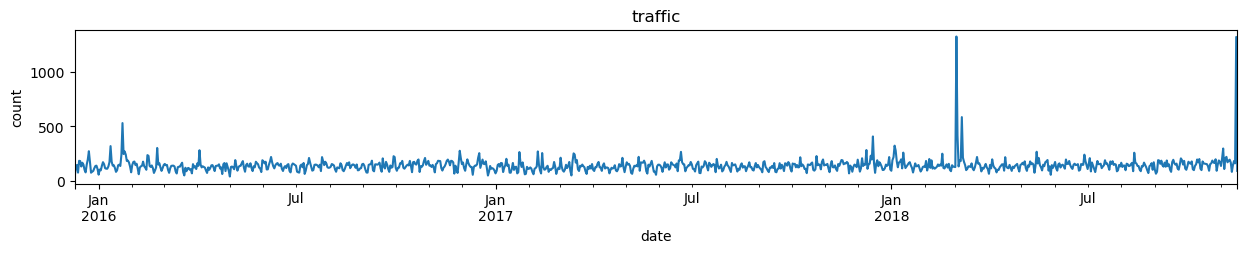

In [28]:
## Vizualizing calls traffic

data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,y='Traffic',figsize=(15,2),legend=None)
plt.title('traffic')
plt.ylabel('count')

Text(0, 0.5, 'count')

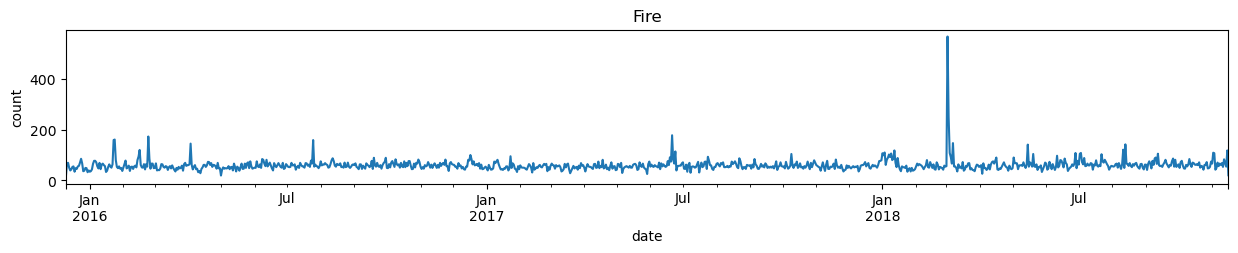

In [29]:
## Vizualizing fire traffic

data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,legend=None,figsize=(15,2),y='Fire')
plt.title('Fire')
plt.ylabel('count')

Text(0.5, 1.0, 'EMS')

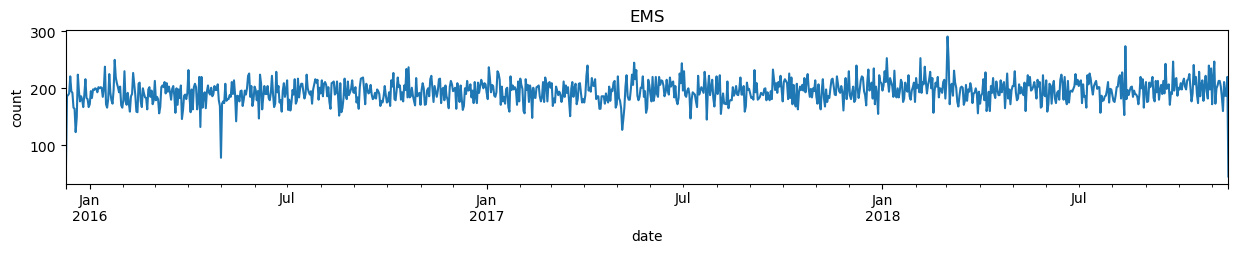

In [30]:
## Vizualizing EMS

data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,legend=None,figsize=(15,2),y='EMS')
plt.ylabel('count')
plt.title('EMS')

Now we are looking at how the time of day and day of week interact with no 911. So we can see this by using heatmap

In [31]:
dfht = data.groupby(['day_of_weak','hour']).count().unstack()['title']
dfht

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_weak,,,,,,,,,,,,,,,,,,,,,
0,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
1,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
2,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399
3,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
4,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
5,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
6,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470


<Axes: xlabel='hour', ylabel='day_of_weak'>

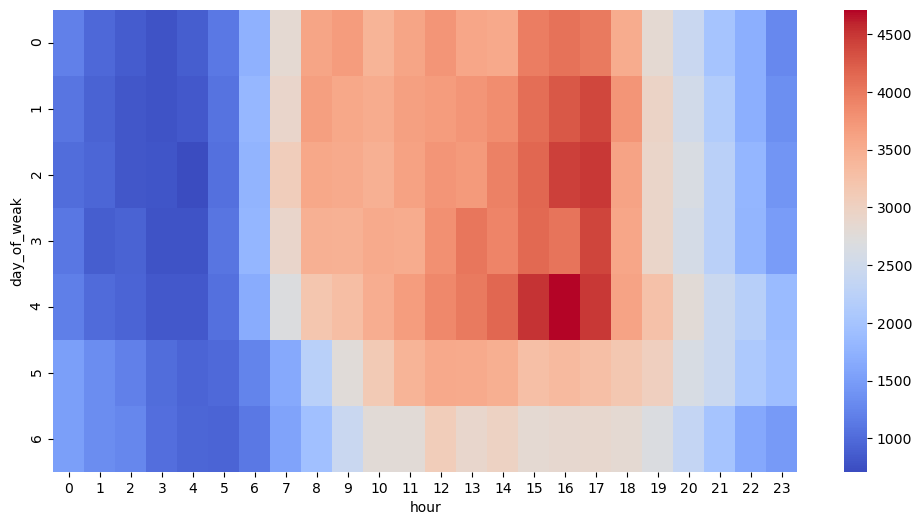

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfht, cmap='coolwarm',ax = ax)

In [33]:
## Creating a dataframe

dfmt = data.groupby(['day_of_weak','month']).count().unstack()['title']
dfmt

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_weak,,,,,,,,,,,,
0,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
1,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
2,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477
3,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
4,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
5,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
6,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896


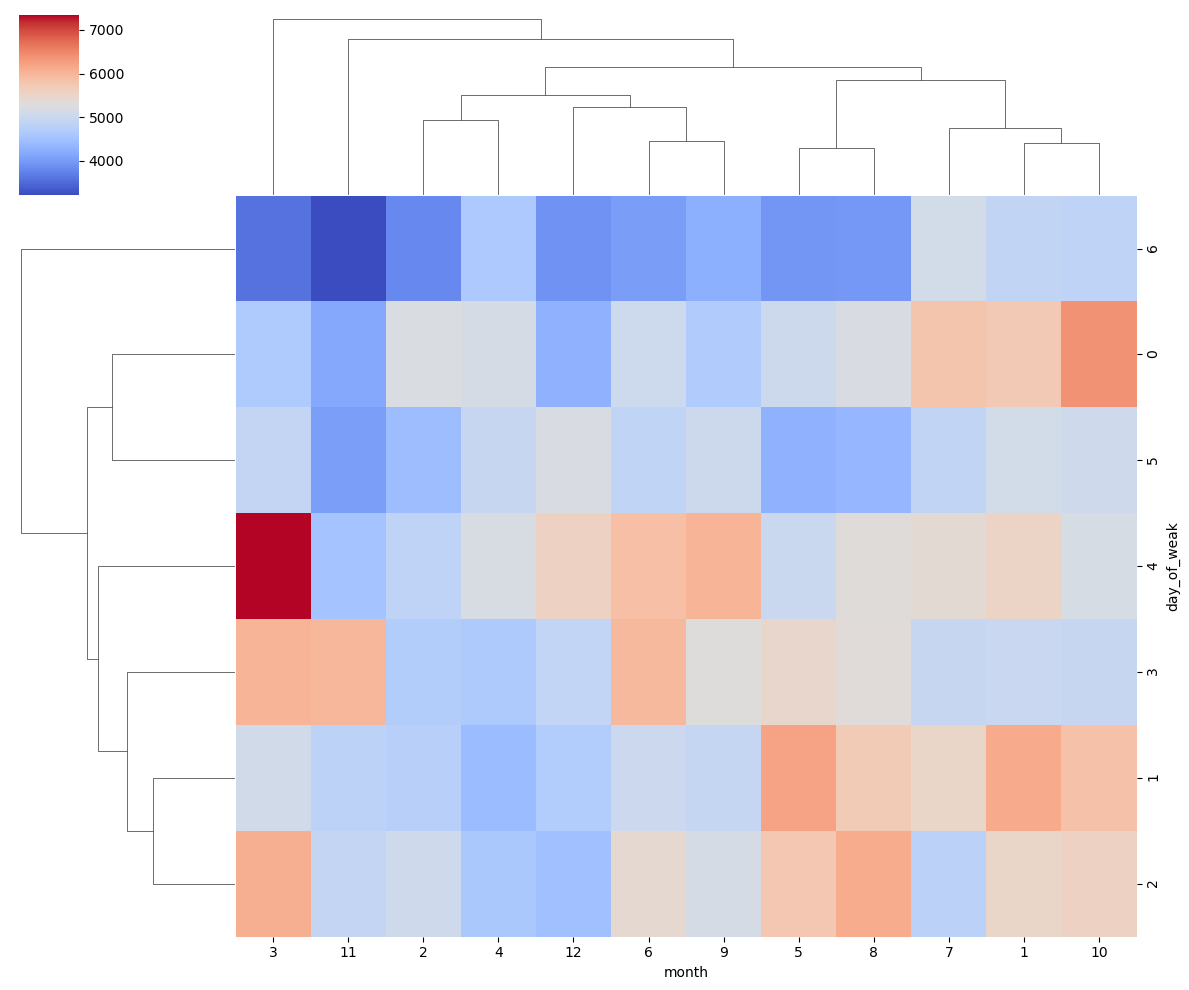

In [34]:
## Let's make a cluster map of the same information

sns.clustermap(dfmt, cmap = 'coolwarm', figsize = (12,10))